# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [327]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [328]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.

# Define la URL base y el nombre del archivo
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_3/"
MEDICAMENTOS = "drug200.csv"

# Función para extraer los datos
def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

# Llama a la función
df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)

# Verifica los datos
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [329]:
# Visualiza el DataFrame
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [330]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

Max Age: 74
Min Age: 15


<Figure size 900x500 with 0 Axes>

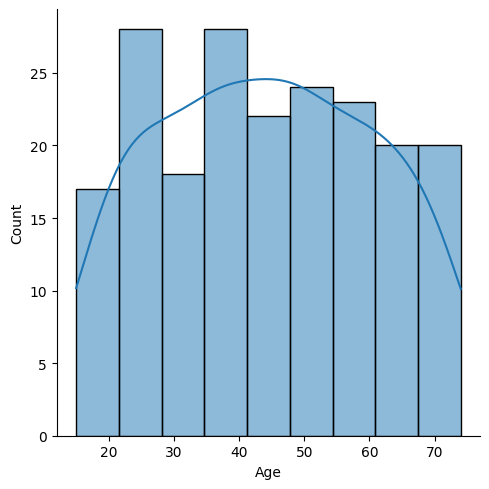

In [331]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns
#Gráfica la variable 
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize = (9,5))
#Crea un displot para de la edad (por ser una variable numérica)

sns.displot(df.Age,kde=True)


In [332]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

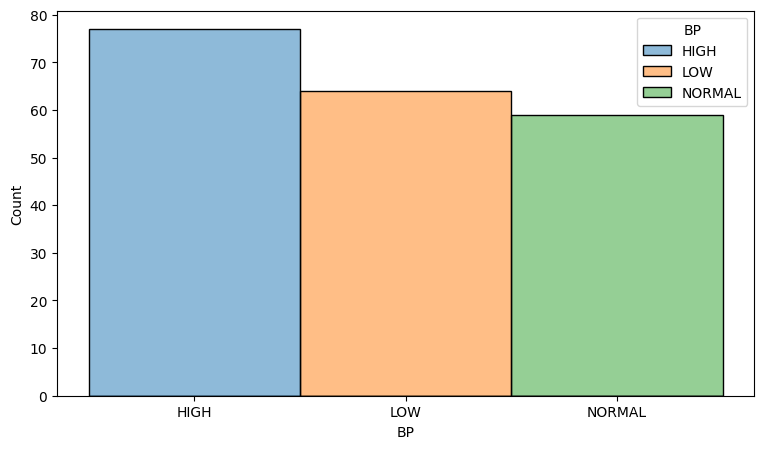

In [333]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="BP",hue="BP")


<Axes: xlabel='Cholesterol', ylabel='Count'>

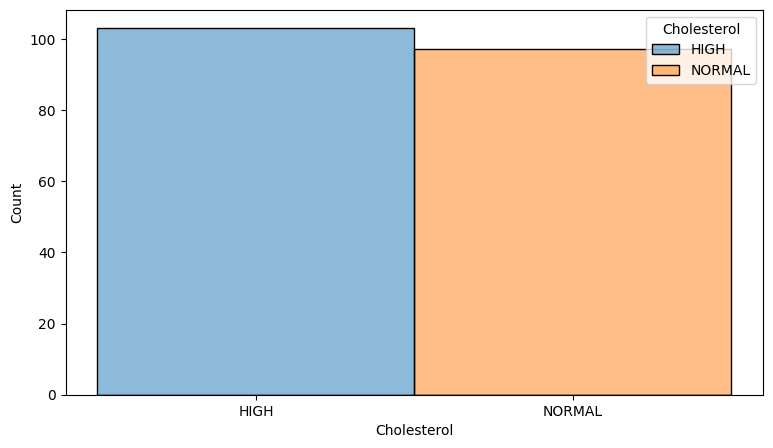

In [334]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")

<Figure size 900x500 with 0 Axes>

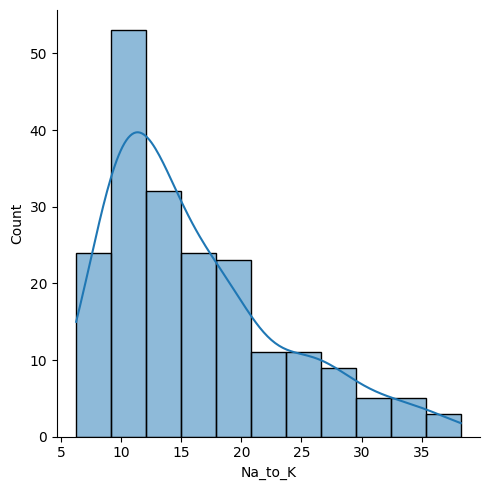

In [335]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))
sns.displot(df.Na_to_K,kde=True)

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

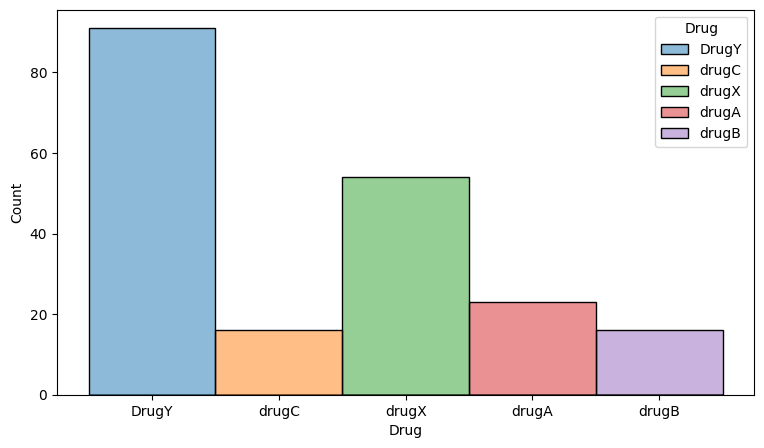

In [336]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Drug",hue="Drug")

#Cuenta los medicamentos
df.Drug.value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad/Medicamento')

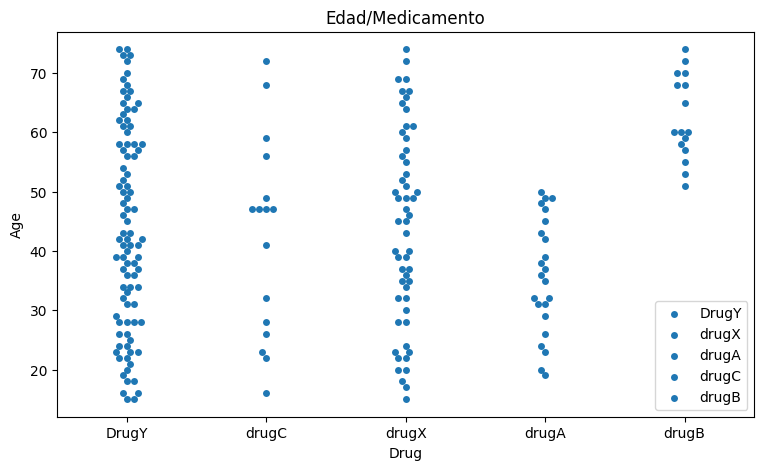

In [337]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad/Medicamento")


In [338]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug


,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


Text(0.5, 1.0, 'Género/Medicamento')

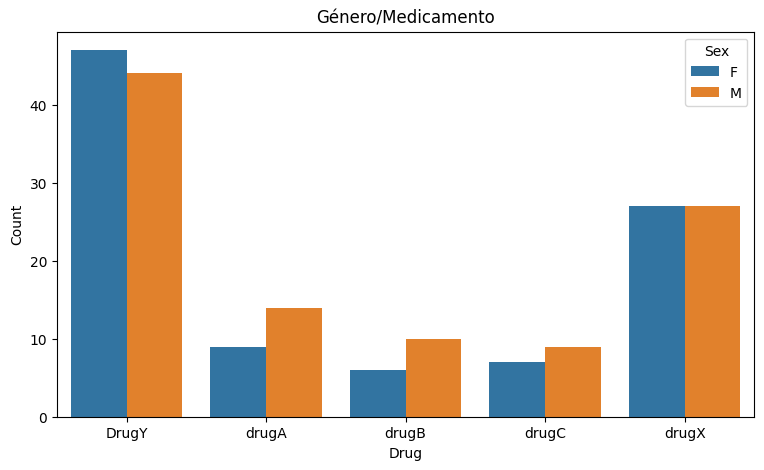

In [339]:
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Género/Medicamento")

Text(0.5, 1.0, 'Presión Sanguinea/Medicamentos')

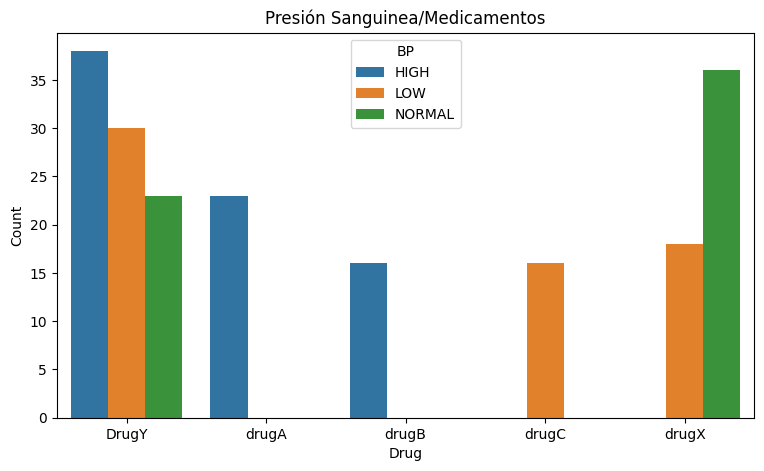

In [340]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("Presión Sanguinea/Medicamentos")


Text(0.5, 1.0, 'Cholesterol -- Drug')

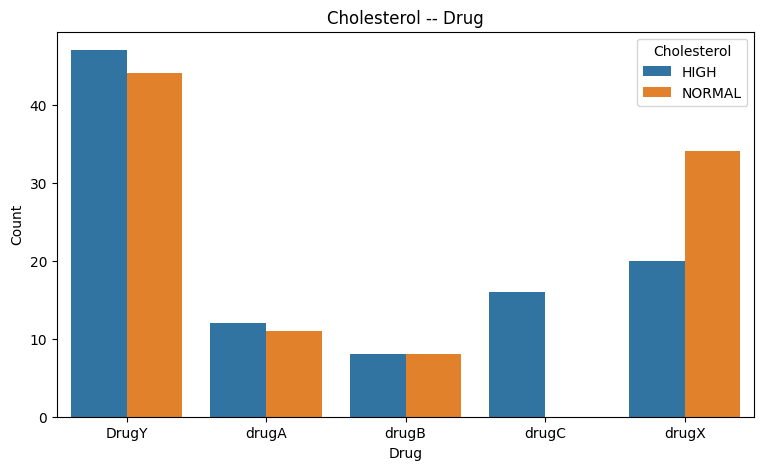

In [341]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")


Text(0.5, 1.0, 'Sodio-Potasio/Medicamentos')

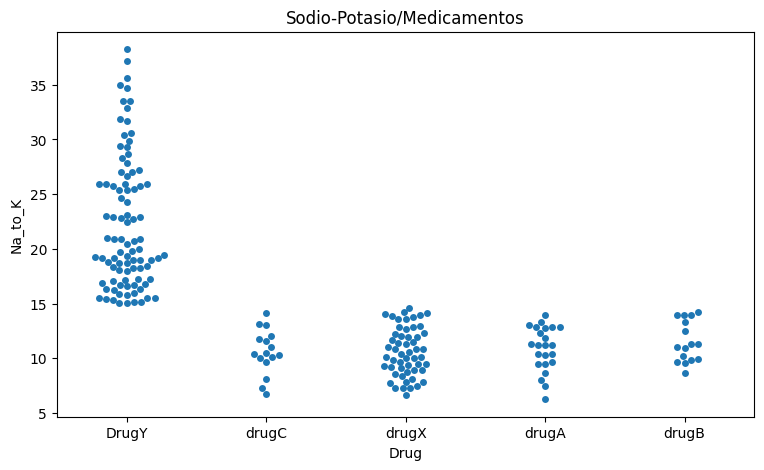

In [342]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Sodio-Potasio/Medicamentos")


***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [343]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]
for l in variables:
    label_encoder(l)
df.head()




,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [344]:
# Crear set de entrenamiento y set de prueba
# Separar predictores y variable objetivo
x = df.drop(["Drug"],axis=1)
y = df.Drug

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)



El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [345]:
## Crear modelo para medicamento
y_train_y = (y_train == 0)
y_test_y = (y_test == 0)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [346]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)


In [347]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.fit(x_train,y_train_y)


SGDClassifier(random_state=42)

In [348]:
# Entrenar el modelo con los datos de entrenamiento
sgd.predict([[47,1,1,0,8]])

C:\Users\muges\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [349]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score



 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [350]:
# Modelo que nunca es Y
cross_val_score(sgd,x_train,y_train_y,cv=3,scoring="accuracy") 

array([0.7962963 , 0.73584906, 0.71698113])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [351]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd,x_train,y_train_y,cv=3)




In [352]:
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_y,y_train_pred)

array([[44, 40],
       [ 0, 76]])

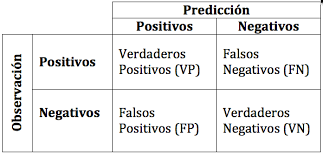

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [353]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r


(0.6551724137931034, 1.0)

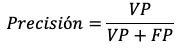

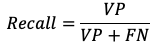

In [354]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Hacer la matriz de confusión otra vez
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train_y)
y_train_pred = cross_val_predict(rfc,x_train,y_train_y,cv=3)


In [355]:
#Calcular la precisión y recall con el nuevo clasificador 
confusion_matrix(y_train_y,y_train_pred)

array([[84,  0],
       [ 2, 74]])

In [356]:
#Calcular F1
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r


(1.0, 0.9736842105263158)

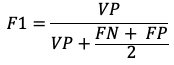

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [357]:
# Puntuación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,1,0,8]])
y_score


C:\Users\muges\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-22523.33667944])

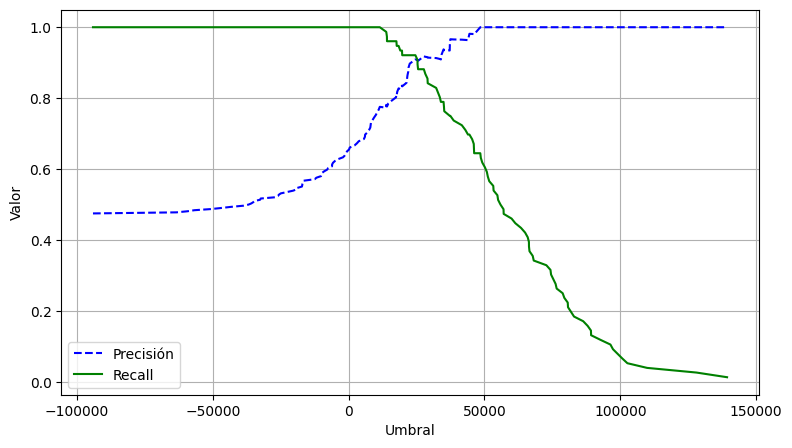

In [358]:
#Graficar la precisión y recall 

y_scores = cross_val_predict(sgd, x_train, y_train_y, cv=3, method="decision_function")
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)
plt.figure(figsize=(9, 5))
plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.xlabel("Umbral")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()


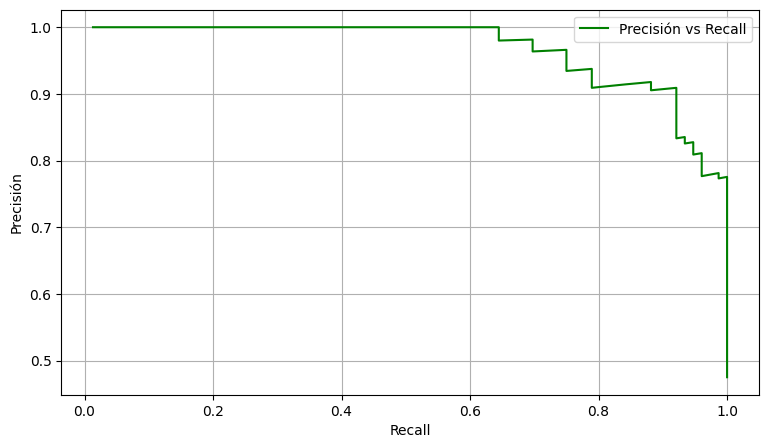

In [359]:
#Graficar la precisión y recall, ahora si
plt.figure(figsize=(9, 5))
plt.plot(recalls[:-1], precisions[:-1], "g-", label="Precisión vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.legend()
plt.grid()
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [360]:
# Encontrar el umbral para una precisión del 90%
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
umbral_90

np.float64(24575.640603301497)

In [361]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)

from sklearn.metrics import precision_score, recall_score
p_90 = precision_score(y_train_y, y_train_90)
r_90 = recall_score(y_train_y, y_train_90)
p_90, r_90

(0.9090909090909091, 0.9210526315789473)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [362]:
# Importar roc_curve
from sklearn.metrics import roc_curve

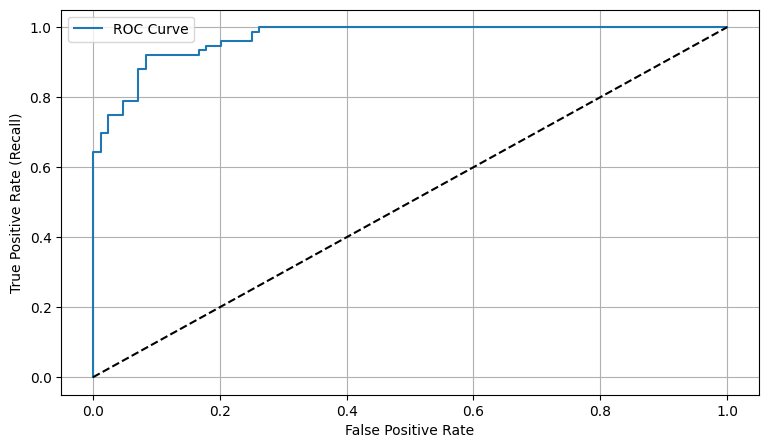

In [363]:
#Graficar la curva ROC
fpr, tpr, umbrales_roc = roc_curve(y_train_y, y_scores)
#Poner una cuadrícula
plt.figure(figsize=(9, 5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [364]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y, y_scores)

np.float64(0.9691416040100251)

In [365]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc, x_train, y_train_y, cv=3, method="predict_proba")
y_scores_forest = y_forest[:, 1]

fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y, y_scores_forest)

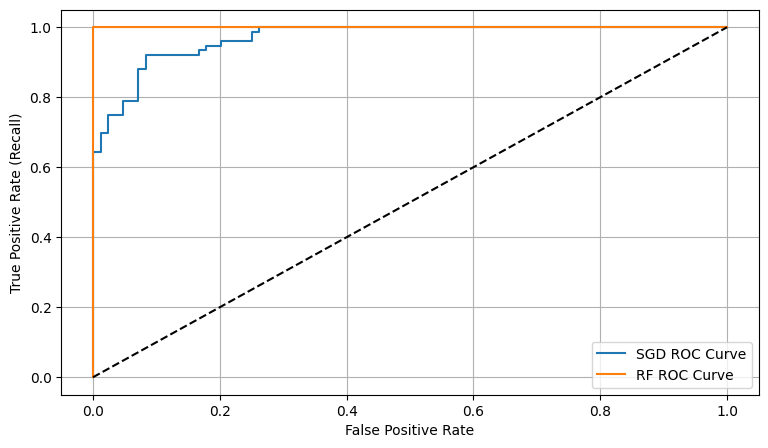

In [366]:
#Graficar la curva ROC y la predicción de random forest 
plt.figure(figsize=(9, 5))
plt.plot(fpr, tpr, label="SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label="RF ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid()
plt.show()

In [367]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y, y_scores_forest)

np.float64(1.0)

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [368]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm.predict([[25, 0, 1, 0, 167.1]])

C:\Users\muges\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [369]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25,0,1,0,167.1]])

# Observar los puntajes de decisión para cada clase
np.argmax(some_scores)

C:\Users\muges\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


np.int64(0)

In [370]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
svm_ovr = OneVsRestClassifier(SVC())
svm_ovr.fit(x_train, y_train)
#Predecir a un humano ahora con este clasificador
svm.predict([[25,0,1,0,167.1]])

C:\Users\muges\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [371]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25,0,1,0,167.1]])
some_scores


C:\Users\muges\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.29350548,  1.78861736,  0.76988692, -0.27118226,  3.16297051]])

***

## <span style="color:green">8. Analizar Errores</span>

In [372]:
#Hacer un clasificador de random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

rfc_multi = RandomForestClassifier(random_state=42)
y_train_pred_multi = cross_val_predict(rfc_multi, x_train, y_train, cv=3)
conf_mx_rfc = confusion_matrix(y_train, y_train_pred_multi)
print("Matriz de confusión (RandomForest multiclase):\n", conf_mx_rfc)



Matriz de confusión (RandomForest multiclase):
 [[75  0  0  1  0]
 [ 0 17  0  0  0]
 [ 0  1 12  0  0]
 [ 0  0  0  7  4]
 [ 0  0  0  0 43]]


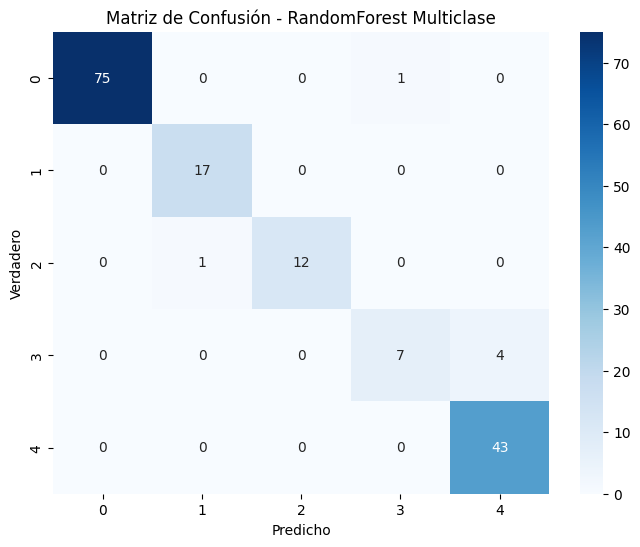

In [373]:
#Utilizar la matriz de confusión 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx_rfc, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - RandomForest Multiclase")
plt.ylabel("Verdadero")
plt.xlabel("Predicho")
plt.show()  

Matriz de confusión (SGD multiclase):
 [[73  0  0  0  3]
 [ 8  0  0  0  9]
 [ 3  0  0  0 10]
 [ 4  0  0  0  7]
 [13  0  0  0 30]]


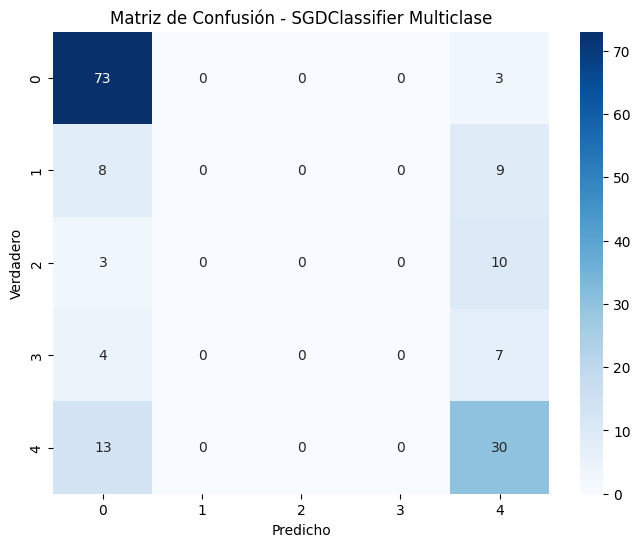

In [374]:
#utilizar ahora SGD
sgd_multi = SGDClassifier(random_state=42, loss='log_loss')  # Asegúrate de que esté entrenado
sgd_multi.fit(x_train, y_train)  # Entrenar si no se hizo antes
y_train_pred_sgd = cross_val_predict(sgd_multi, x_train, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred_sgd)
print("Matriz de confusión (SGD multiclase):\n", conf_mx_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mx_sgd, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - SGDClassifier Multiclase")
plt.ylabel("Verdadero")
plt.xlabel("Predicho")
plt.show()